# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
# tf.debugging.set_log_device_placement(True)
tf.test.is_gpu_available()

True

In [7]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [8]:
tf.reset_default_graph()

In [9]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 30
env_name = 'Spiral7x7'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/blbudima/miniconda3/envs/sgm/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [10]:
# from sgm.trainer import train_eval

# train_eval(agent,
#           tf_env,
#           eval_tf_env,
#           initial_collect_steps=1000,
#           eval_interval=1000,
#           num_eval_episodes=10,
#           num_iterations=30000,
#           save_model_dir=model_dir,
#           experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 997/30000 [00:24<10:41, 45.24it/s] 

Saved checkpoint for step 1000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.873873
INFO:tensorflow:45.237 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.50
INFO:tensorflow:		 predicted_dist = 20.5 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -30.00
INFO:tensorflow:		 predicted_dist = 21.5 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -26.90
INFO:tensorflow:		 predicted_dist = 21.8 (0.7)
INFO:tensorflow:	 eval_time = 6.19


  7%|▋         | 1998/30000 [00:54<10:33, 44.22it/s]  

Saved checkpoint for step 2000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 2.330487
INFO:tensorflow:50.312 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -24.70
INFO:tensorflow:		 predicted_dist = 21.1 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -28.20
INFO:tensorflow:		 predicted_dist = 23.9 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 25.4 (1.4)
INFO:tensorflow:	 eval_time = 5.46


 10%|▉         | 2999/30000 [01:22<13:11, 34.10it/s]  

Saved checkpoint for step 3000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 1.899035
INFO:tensorflow:50.219 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -22.00
INFO:tensorflow:		 predicted_dist = 20.1 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.50
INFO:tensorflow:		 predicted_dist = 23.6 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -26.40
INFO:tensorflow:		 predicted_dist = 25.7 (1.1)
INFO:tensorflow:	 eval_time = 5.04


 13%|█▎        | 3997/30000 [01:50<10:06, 42.88it/s]  

Saved checkpoint for step 4000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 1.924826
INFO:tensorflow:50.245 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.80
INFO:tensorflow:		 predicted_dist = 18.6 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -22.10
INFO:tensorflow:		 predicted_dist = 24.1 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -25.00
INFO:tensorflow:		 predicted_dist = 26.1 (0.5)
INFO:tensorflow:	 eval_time = 4.45


 17%|█▋        | 4997/30000 [02:17<09:25, 44.22it/s]  

Saved checkpoint for step 5000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 2.705264
INFO:tensorflow:50.442 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.40
INFO:tensorflow:		 predicted_dist = 17.9 (3.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.40
INFO:tensorflow:		 predicted_dist = 23.4 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -24.40
INFO:tensorflow:		 predicted_dist = 26.1 (1.0)
INFO:tensorflow:	 eval_time = 3.80


 20%|█▉        | 5997/30000 [02:44<09:40, 41.35it/s]  

Saved checkpoint for step 6000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 2.642171
INFO:tensorflow:49.963 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -9.40
INFO:tensorflow:		 predicted_dist = 12.4 (4.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.30
INFO:tensorflow:		 predicted_dist = 17.9 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.70
INFO:tensorflow:		 predicted_dist = 24.3 (2.3)
INFO:tensorflow:	 eval_time = 3.04


 23%|██▎       | 6999/30000 [03:10<11:41, 32.79it/s]  

Saved checkpoint for step 7000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 2.950049
INFO:tensorflow:49.949 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 12.5 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 16.3 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 19.6 (2.6)
INFO:tensorflow:	 eval_time = 2.63


 27%|██▋       | 7998/30000 [03:36<07:55, 46.29it/s]  

Saved checkpoint for step 8000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 2.584220
INFO:tensorflow:49.723 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 10.7 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 14.2 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.00
INFO:tensorflow:		 predicted_dist = 18.2 (3.3)
INFO:tensorflow:	 eval_time = 2.65


 30%|██▉       | 8999/30000 [04:02<10:18, 33.93it/s]  

Saved checkpoint for step 9000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 3.312888
INFO:tensorflow:49.417 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 8.5 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 11.1 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.20
INFO:tensorflow:		 predicted_dist = 15.7 (1.7)
INFO:tensorflow:	 eval_time = 2.65


 33%|███▎      | 9998/30000 [04:28<07:45, 42.96it/s]  

Saved checkpoint for step 10000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 3.150538
INFO:tensorflow:49.326 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 6.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.20
INFO:tensorflow:		 predicted_dist = 10.0 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.40
INFO:tensorflow:		 predicted_dist = 13.3 (1.0)
INFO:tensorflow:	 eval_time = 2.84


 37%|███▋      | 10998/30000 [04:54<07:06, 44.53it/s]  

Saved checkpoint for step 11000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 3.547618
INFO:tensorflow:49.546 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 6.8 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 10.8 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.90
INFO:tensorflow:		 predicted_dist = 14.6 (1.8)
INFO:tensorflow:	 eval_time = 2.76


 40%|███▉      | 11998/30000 [05:20<06:41, 44.78it/s]  

Saved checkpoint for step 12000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 3.559717
INFO:tensorflow:49.941 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 6.1 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 10.9 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.80
INFO:tensorflow:		 predicted_dist = 14.9 (1.9)
INFO:tensorflow:	 eval_time = 2.49


 43%|████▎     | 12998/30000 [05:45<06:31, 43.46it/s]

Saved checkpoint for step 13000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 3.159183
INFO:tensorflow:50.980 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 6.7 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.90
INFO:tensorflow:		 predicted_dist = 10.6 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 16.1 (2.0)
INFO:tensorflow:	 eval_time = 2.66


 47%|████▋     | 13998/30000 [06:11<06:22, 41.85it/s]

Saved checkpoint for step 14000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 3.255921
INFO:tensorflow:48.784 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 5.9 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 9.4 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.90
INFO:tensorflow:		 predicted_dist = 14.6 (2.2)
INFO:tensorflow:	 eval_time = 2.58


 50%|████▉     | 14998/30000 [06:37<06:00, 41.59it/s]

Saved checkpoint for step 15000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 3.548220
INFO:tensorflow:48.122 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 5.9 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 9.8 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 14.0 (1.5)
INFO:tensorflow:	 eval_time = 2.65


 53%|█████▎    | 15996/30000 [07:03<05:42, 40.90it/s]

Saved checkpoint for step 16000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 3.526932
INFO:tensorflow:49.101 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.50
INFO:tensorflow:		 predicted_dist = 5.3 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.50
INFO:tensorflow:		 predicted_dist = 9.6 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.40
INFO:tensorflow:		 predicted_dist = 15.3 (1.0)
INFO:tensorflow:	 eval_time = 2.60


 57%|█████▋    | 16995/30000 [07:29<04:51, 44.60it/s]

Saved checkpoint for step 17000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 3.154572
INFO:tensorflow:49.344 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.60
INFO:tensorflow:		 predicted_dist = 5.0 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.30
INFO:tensorflow:		 predicted_dist = 7.7 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 13.6 (3.3)
INFO:tensorflow:	 eval_time = 2.45


 60%|█████▉    | 17995/30000 [07:55<04:49, 41.48it/s]

Saved checkpoint for step 18000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 3.321472
INFO:tensorflow:48.740 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 4.2 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 8.4 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 12.5 (2.2)
INFO:tensorflow:	 eval_time = 2.55


 63%|██████▎   | 18998/30000 [08:22<04:25, 41.44it/s]

Saved checkpoint for step 19000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 3.407772
INFO:tensorflow:48.383 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 4.8 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.40
INFO:tensorflow:		 predicted_dist = 10.1 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.00
INFO:tensorflow:		 predicted_dist = 13.3 (1.2)
INFO:tensorflow:	 eval_time = 2.73


 67%|██████▋   | 19995/30000 [08:49<03:54, 42.58it/s]

Saved checkpoint for step 20000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 3.560565
INFO:tensorflow:48.111 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 5.6 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.50
INFO:tensorflow:		 predicted_dist = 10.0 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 15.5 (0.9)
INFO:tensorflow:	 eval_time = 2.58


 70%|██████▉   | 20995/30000 [09:15<03:33, 42.18it/s]

Saved checkpoint for step 21000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 4.189579
INFO:tensorflow:49.265 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 6.2 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.30
INFO:tensorflow:		 predicted_dist = 10.0 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.40
INFO:tensorflow:		 predicted_dist = 14.0 (1.3)
INFO:tensorflow:	 eval_time = 2.71


 73%|███████▎  | 21999/30000 [09:41<04:03, 32.88it/s]

Saved checkpoint for step 22000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 3.632322
INFO:tensorflow:48.812 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 5.6 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.90
INFO:tensorflow:		 predicted_dist = 10.2 (2.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.50
INFO:tensorflow:		 predicted_dist = 16.3 (1.6)
INFO:tensorflow:	 eval_time = 2.47


 77%|███████▋  | 22997/30000 [10:07<02:44, 42.61it/s]

Saved checkpoint for step 23000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 3.456774
INFO:tensorflow:48.368 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.40
INFO:tensorflow:		 predicted_dist = 5.2 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.30
INFO:tensorflow:		 predicted_dist = 8.6 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -13.80
INFO:tensorflow:		 predicted_dist = 16.3 (4.0)
INFO:tensorflow:	 eval_time = 2.38


 80%|███████▉  | 23997/30000 [10:33<02:18, 43.20it/s]

Saved checkpoint for step 24000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 3.258040
INFO:tensorflow:49.358 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 5.7 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 8.3 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.90
INFO:tensorflow:		 predicted_dist = 12.9 (2.0)
INFO:tensorflow:	 eval_time = 2.63


 83%|████████▎ | 24999/30000 [11:00<02:45, 30.17it/s]

Saved checkpoint for step 25000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 4.090943
INFO:tensorflow:48.355 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 5.0 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.80
INFO:tensorflow:		 predicted_dist = 8.6 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.70
INFO:tensorflow:		 predicted_dist = 14.0 (2.0)
INFO:tensorflow:	 eval_time = 2.77


 87%|████████▋ | 25998/30000 [11:26<01:37, 40.93it/s]

Saved checkpoint for step 26000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 3.158135
INFO:tensorflow:47.897 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 4.3 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 9.0 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 13.8 (1.2)
INFO:tensorflow:	 eval_time = 2.72


 90%|████████▉ | 26999/30000 [11:54<01:33, 32.12it/s]

Saved checkpoint for step 27000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 3.266797
INFO:tensorflow:47.497 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 4.6 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 9.4 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 13.9 (1.9)
INFO:tensorflow:	 eval_time = 2.62


 93%|█████████▎| 27998/30000 [12:20<00:49, 40.45it/s]

Saved checkpoint for step 28000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 3.344389
INFO:tensorflow:47.941 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.50
INFO:tensorflow:		 predicted_dist = 4.9 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 10.1 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.80
INFO:tensorflow:		 predicted_dist = 15.2 (1.7)
INFO:tensorflow:	 eval_time = 2.63


 97%|█████████▋| 28996/30000 [12:47<00:24, 40.38it/s]

Saved checkpoint for step 29000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 4.091320
INFO:tensorflow:47.923 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 5.5 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 10.0 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.00
INFO:tensorflow:		 predicted_dist = 16.2 (2.4)
INFO:tensorflow:	 eval_time = 2.60


100%|█████████▉| 29996/30000 [13:13<00:00, 42.89it/s]

Saved checkpoint for step 30000: /home/blbudima/sgm/notebooks/../agents/thinned_spiral7x7/Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 3.510114
INFO:tensorflow:49.412 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.10
INFO:tensorflow:		 predicted_dist = 5.9 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 9.4 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 16.1 (2.3)
INFO:tensorflow:	 eval_time = 2.69


100%|██████████| 30000/30000 [13:16<00:00, 37.68it/s]


LossInfo(loss=<tf.Tensor: id=1149426, shape=(), dtype=float32, numpy=3.5101137>, extra=(<tf.Tensor: id=1149427, shape=(), dtype=float32, numpy=1.0911326>, <tf.Tensor: id=1149428, shape=(), dtype=float32, numpy=2.418981>))

# Load trained model into agent

In [11]:
filename = "Spiral7x7_coordinate_30steps-May-12-2021-01-09-28-AM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [12]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=10)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

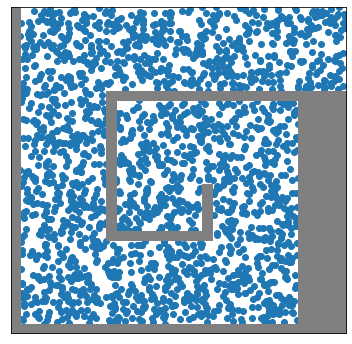

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [14]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

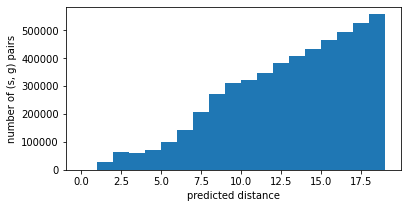

In [15]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 227 nodes and 4135 edges


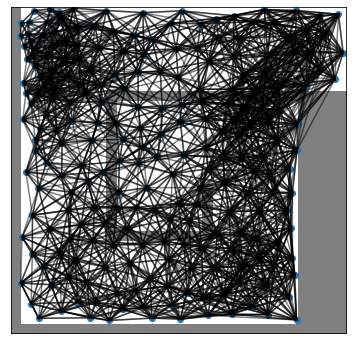

In [16]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 1132 edges


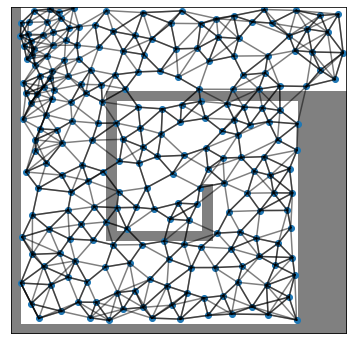

In [17]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 908 edges


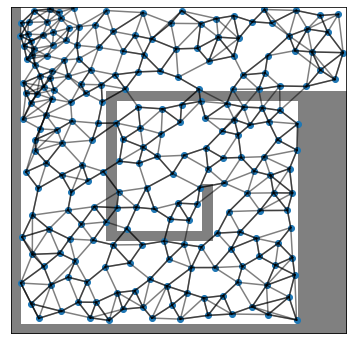

In [18]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 681 edges


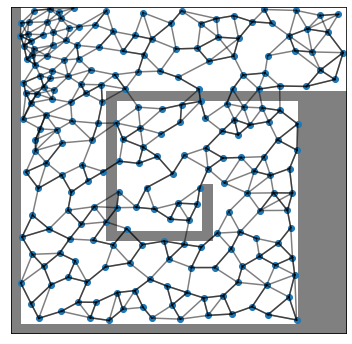

In [19]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 454 edges


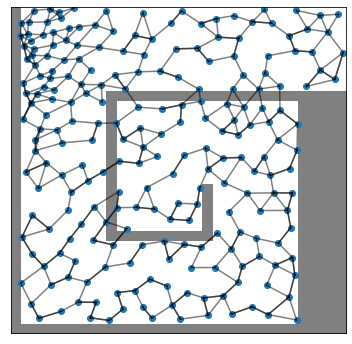

In [20]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 227 edges


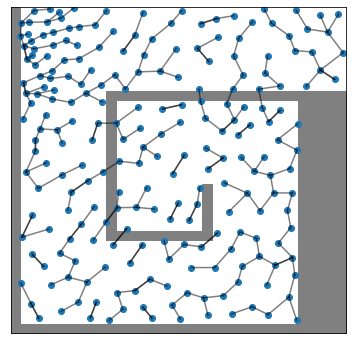

In [21]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

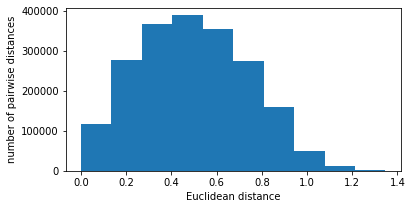

In [22]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [23]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

# Cleanup and evaluate SGM

In [24]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.00
Evaluated initial SGM success rate in 505.47 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 870.82 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 852.38 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 862.12 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.75
Took 5000 cleanup steps and evaluated SGM success rate in 679.72 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.70
Took 5000 cleanup steps and evaluated SGM success rate in 673.67 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.65
Took 5000 cleanup steps and evaluated SGM success rate in 663.53 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.75
Took 5000 c

# Load cleanup graphs

In [25]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

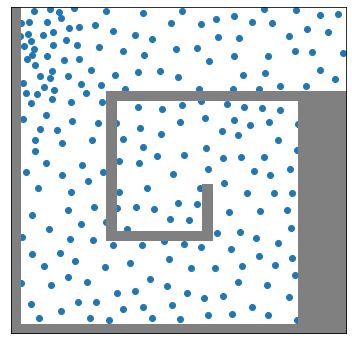

In [26]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 4135 edges


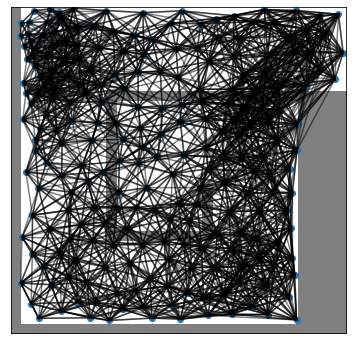

In [27]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 1132 edges


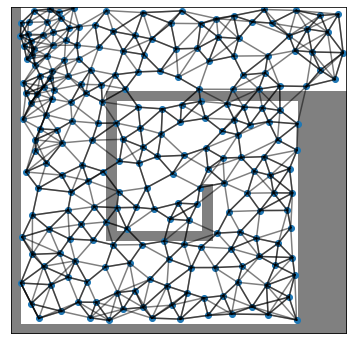

In [28]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 1026 edges


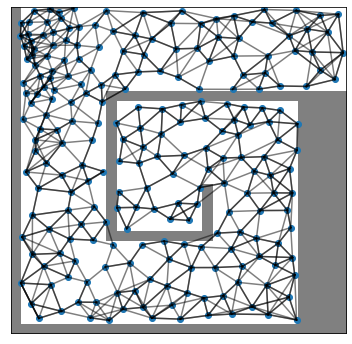

In [29]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 227 nodes and 106 edges


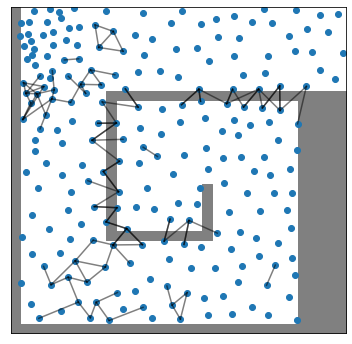

In [30]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)